# introduction to neural network classification with tensorflow

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles
# make 1000 examples
n_samples = 1000


# Create circles
X, y = make_circles(n_samples, 
                   noise = 0.03, 
                   random_state=42)


In [2]:
# Check out features
X


array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check the labels 
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

# Visualize the data

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


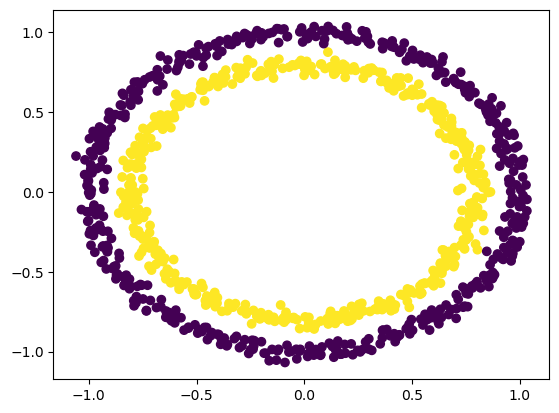

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y)

## input and output shapes

In [6]:
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
len(X), len(y)

(1000, 1000)

In [8]:
X[110], y[110]

(array([0.76597921, 0.29169219]), 1)

## steps in modelling

In [9]:
import tensorflow as tf

tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['accuracy'])
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 0.7832 - accuracy: 0.4990
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7788 - accuracy: 0.5000
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7746 - accuracy: 0.4990
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7704 - accuracy: 0.5000
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7664 - accuracy: 0.4990


In [10]:
model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.7643 - accuracy: 0.5000


[0.7642994523048401, 0.5]

## Improving our model

In [11]:
# improve our model by training longer
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.4950


[0.6931473016738892, 0.4950000047683716]

In [12]:
# improve our model by adding another layers
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), 
    tf.keras.layers.Dense(10), 
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

model_2.fit(X, y, epochs=100, verbose=0)


In [13]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6969 - accuracy: 0.5070


[0.6969131231307983, 0.5070000290870667]

## visualize our model prediction

In [14]:
import numpy as np


In [15]:

def plot_decision_boundary(model, x, y):
    """
    Plots the decision boundary created by a model predicting on X
    """
    
    x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
    y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
    
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Create X value
    x_in = np.c_[xx.ravel(), yy.ravel()]
    
    #make predictions
    y_pred = model.predict(x_in)
    
    #check for multi-class
    if len(y_pred[0]) > 1:
        print("doing multiclass classification")
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
        
    # plot decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
doing binary classification


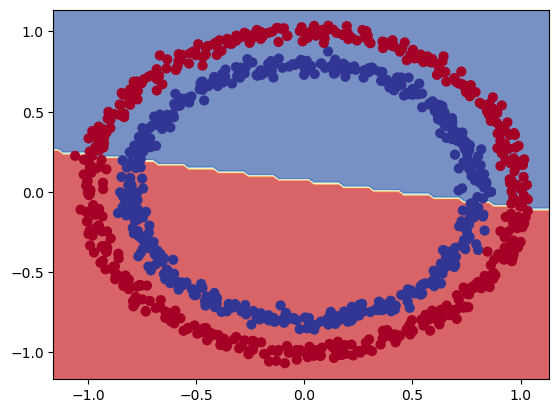

In [16]:
plot_decision_boundary(model_1, X, y)

In [17]:
# improve our model by adding activation function
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['accuracy'])

model_3.fit(X, y, epochs=100, verbose=0)
model_3.evaluate(X, y)

32/32 [==============================] - 1s 3ms/step - loss: 0.6774 - accuracy: 0.6950


[0.6774066090583801, 0.6949999928474426]

In [18]:
# let's see if our model can be used for a regression problem

tf.random.set_seed(42)

X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) #y = X + 100

#Split our data 
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), 
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_4.compile(loss=tf.keras.losses.mae, 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])
model_4.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 488.1263 - mae: 488.1263
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 378.2371 - mae: 378.2371
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 273.8380 - mae: 273.8380
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 166.6222 - mae: 166.6222
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 63.3726 - mae: 63.3726
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 74.3908 - mae: 74.3908
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 83.3026 - mae: 83.3026
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 57.3481 - mae: 57.3481
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 45.6302 - mae: 45.6302
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 50.5413 - mae: 50.5413
Epoch 11/100
5/5 [==============================] -

2/2 [==============================] - 0s 5ms/step


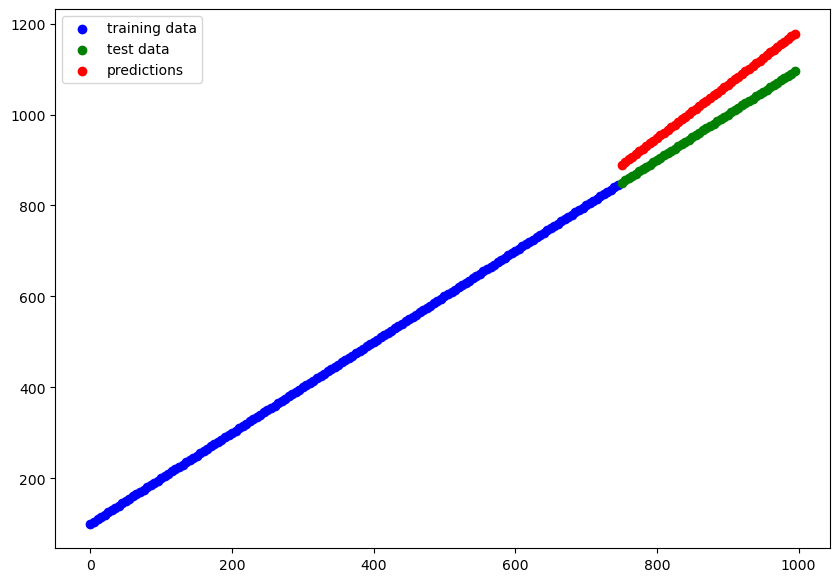

In [19]:
# make predictions with our trained model

y_reg_preds = model_4.predict(X_reg_test)

#plot the model's preditions 
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label="training data")
plt.scatter(X_reg_test, y_reg_test, c='g', label="test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="predictions")
plt.legend()

## Non-linearity

In [20]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
               optimizer=tf.keras.optimizers.Adam(lr=0.001), 
               metrics=['accuracy'])

history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 5.0918 - accuracy: 0.4780
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.9318 - accuracy: 0.4770
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.9194 - accuracy: 0.4780
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.9084 - accuracy: 0.4780
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.8939 - accuracy: 0.4790
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 4.8572 - accuracy: 0.4790
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 4.7936 - accuracy: 0.4800
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 4.6756 - accuracy: 0.4800
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5570 - accuracy: 0.4740
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5066 - accuracy: 0.4770
Epoch 11/

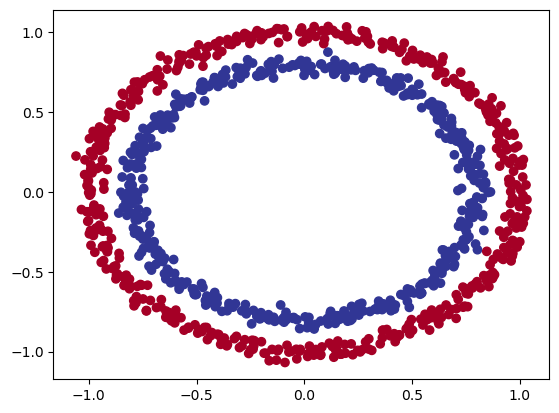

In [21]:
#check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 1s 2ms/step
doing binary classification


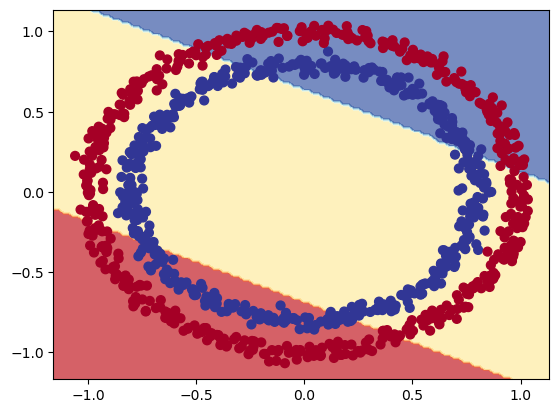

In [22]:
plot_decision_boundary(model_5, X, y)

In [23]:
tf.random.set_seed(42)
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
               metrics=['accuracy'])
history = model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.8010 - accuracy: 0.4840
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7783 - accuracy: 0.4830
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7727 - accuracy: 0.4810
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7713 - accuracy: 0.4820
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7701 - accuracy: 0.4820
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7690 - accuracy: 0.4840
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7679 - accuracy: 0.4840
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 5.7670 - accuracy: 0.4840
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7660 - accuracy: 0.4840
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7652 - accuracy: 0.4840
Epoch 11/

In [24]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=['accuracy'])
history = model_7.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 3.7746 - accuracy: 0.4800
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 3.5578 - accuracy: 0.4840
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 3.4629 - accuracy: 0.4820
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 3.3691 - accuracy: 0.4830
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 3.2385 - accuracy: 0.4790
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.1029 - accuracy: 0.4790
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 2.8931 - accuracy: 0.4760
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 2.6413 - accuracy: 0.4690
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 2.4443 - accuracy: 0.4370
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 2.3906 - accuracy: 0.4450
Epoch 11/

313/313 [==============================] - 0s 1ms/step
doing binary classification


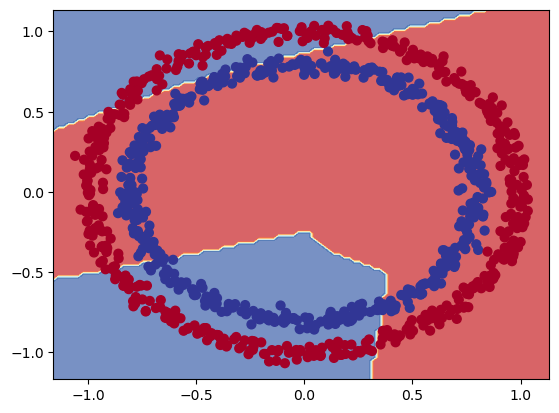

In [25]:
plot_decision_boundary(model_7, X, y)

In [26]:
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), 
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
               metrics=['accuracy'])
history = model_8.fit(X, y, epochs=500)

Epoch 1/500
32/32 [==============================] - 1s 2ms/step - loss: 0.6955 - accuracy: 0.5050
Epoch 2/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.5060
Epoch 3/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.5010
Epoch 4/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6909 - accuracy: 0.5040
Epoch 5/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6899 - accuracy: 0.5120
Epoch 6/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5110
Epoch 7/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6877 - accuracy: 0.5170
Epoch 8/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6870 - accuracy: 0.5260
Epoch 9/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6859 - accuracy: 0.5320
Epoch 10/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6850 - accuracy: 0.5270
Epoch 11/

313/313 [==============================] - 0s 1ms/step
doing binary classification


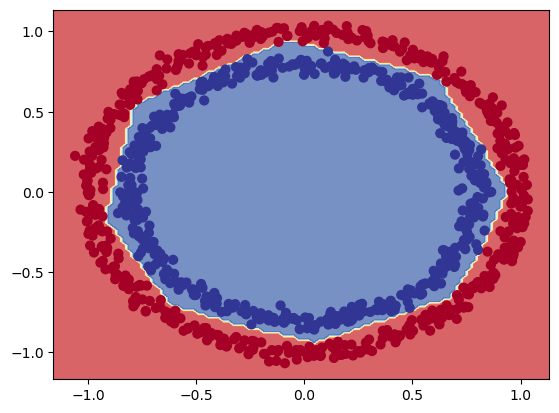

In [27]:
plot_decision_boundary(model_8, X, y)

In [28]:
model_8.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0067 - accuracy: 1.0000


[0.006695389747619629, 1.0]

In [29]:
# Create a toy tensor
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

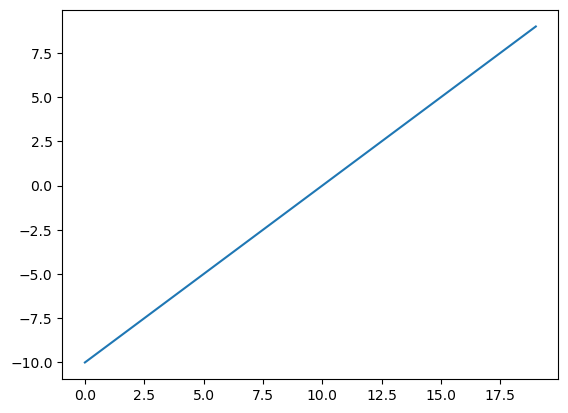

In [30]:
# Visualize our toy tensor
plt.plot(A)

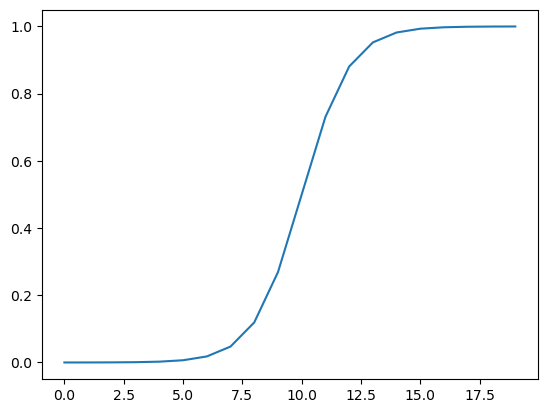

In [31]:
def sigmoid(x):
    return 1/(1+tf.exp(-x))

sig_x = sigmoid(A)
plt.plot(sig_x)

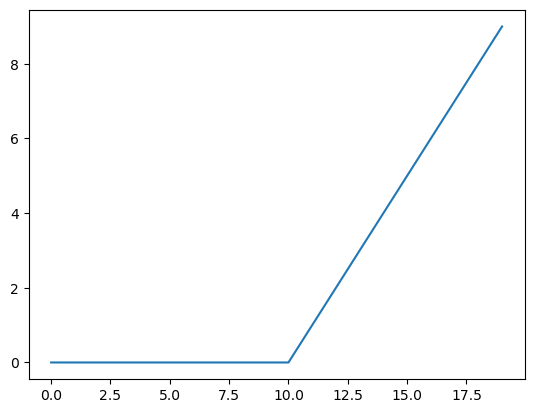

In [32]:
def relu(x):
    return tf.maximum(0, x)
relu_A = relu(A)
plt.plot(relu_A)

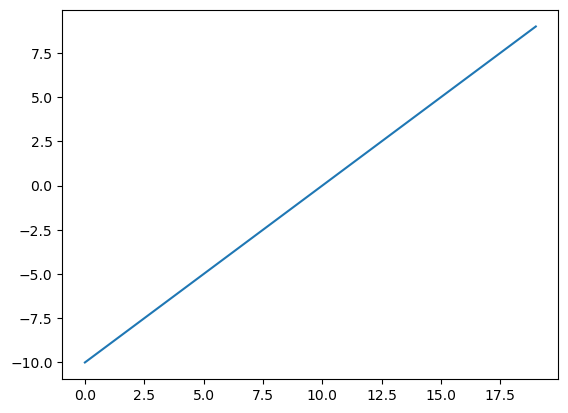

In [33]:
# linear activation function
linear_A = tf.keras.activations.linear(A)
plt.plot(linear_A)

## Evaluating and improving our classification

In [34]:
len(X)

1000

In [35]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [36]:
# recreate a model 
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_9.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics=['accuracy'])
history = model_9.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.6912 - accuracy: 0.5175
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6879 - accuracy: 0.5337
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6845 - accuracy: 0.5213
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6790 - accuracy: 0.5412
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6727 - accuracy: 0.5725
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6653 - accuracy: 0.5675
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6569 - accuracy: 0.5825
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6508 - accuracy: 0.5987
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6438 - accuracy: 0.5962
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6311 - accuracy: 0.6300
Epoch 11/25
25/25 [

In [37]:
#evaluate the model on the test dataset
model_9.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1770 - accuracy: 0.9900


[0.17700421810150146, 0.9900000095367432]

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


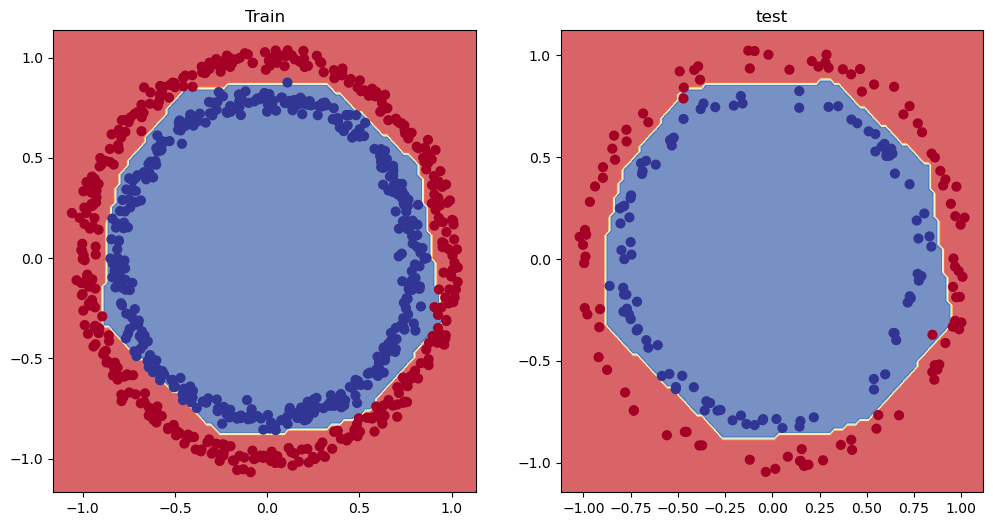

In [38]:
# plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_9, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("test")
plot_decision_boundary(model_9, X_test, y_test)

## plot the loss curves

In [39]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.691216,0.51750
1,0.687881,0.53375
2,0.684497,0.52125
3,0.678994,0.54125
4,0.672670,0.57250
5,0.665273,0.56750
6,0.656895,0.58250
7,0.650797,0.59875
8,0.643753,0.59625
9,0.631119,0.63000


Text(0.5, 1.0, 'model_9 loss curves')

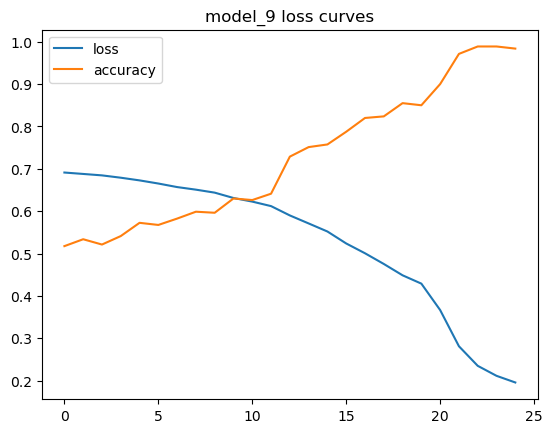

In [40]:
# plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("model_9 loss curves")

## Finding the best learning rate 

In [41]:
tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_10.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4 * 10**(epoch/20))

# Fit the model
history = model_10.fit(X_train, y_train, epochs=100,
                      callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6994 - accuracy: 0.5125 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6991 - accuracy: 0.5125 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6989 - accuracy: 0.5138 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6986 - accuracy: 0.5113 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6983 - accuracy: 0.5175 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6980 - accuracy: 0.5125 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6976 - accuracy: 0.5150 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.5175 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

<Axes: xlabel='epochs'>

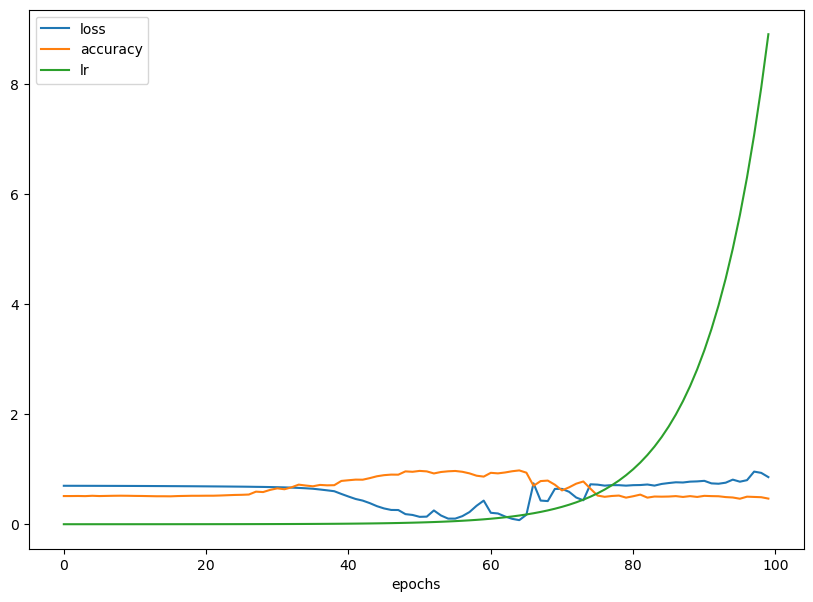

In [42]:
#checkout the history
pd.DataFrame(history.history).plot(figsize=(10, 7), xlabel="epochs")

Text(0.5, 1.0, 'learning rate vs loss')

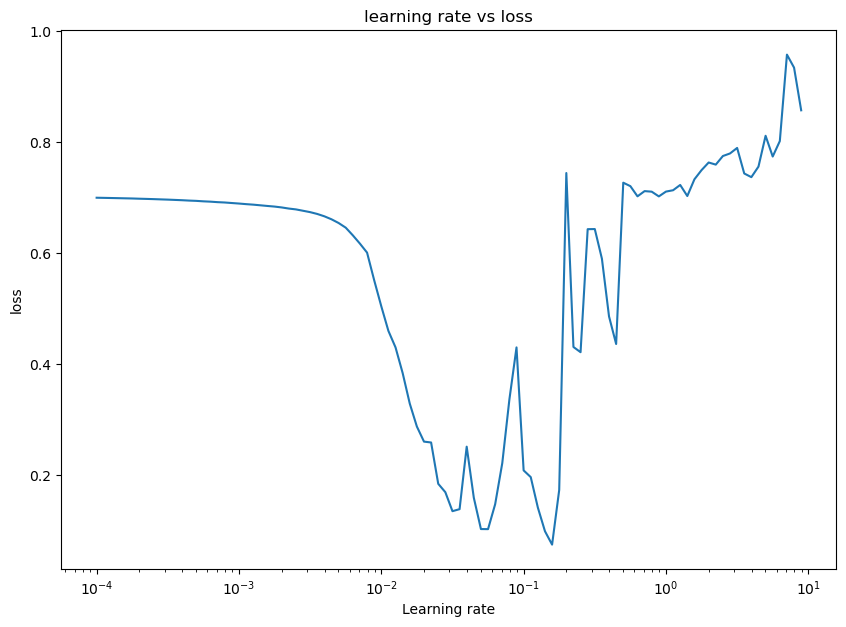

In [43]:
 # plot the learning rate versus the loss
lrs = 1e-4 * (10**(tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs,history.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('loss')
plt.title("learning rate vs loss")

In [44]:
tf.random.set_seed(42)
model_11 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_11.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics=['accuracy'])
history_11 = model_11.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 0.6923 - accuracy: 0.5188
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6865 - accuracy: 0.5337
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6764 - accuracy: 0.5412
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6578 - accuracy: 0.6225
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6322 - accuracy: 0.6500
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5799 - accuracy: 0.7025
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5453 - accuracy: 0.7400
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4985 - accuracy: 0.7675
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4663 - accuracy: 0.8037
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4274 - accuracy: 0.8300
Epoch 11/20
25/25 [

In [45]:
model_11.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.2536 - accuracy: 0.9350


[0.25363627076148987, 0.9350000023841858]

In [46]:
model_9.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1770 - accuracy: 0.9900


[0.17700421810150146, 0.9900000095367432]

313/313 [==============================] - 1s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


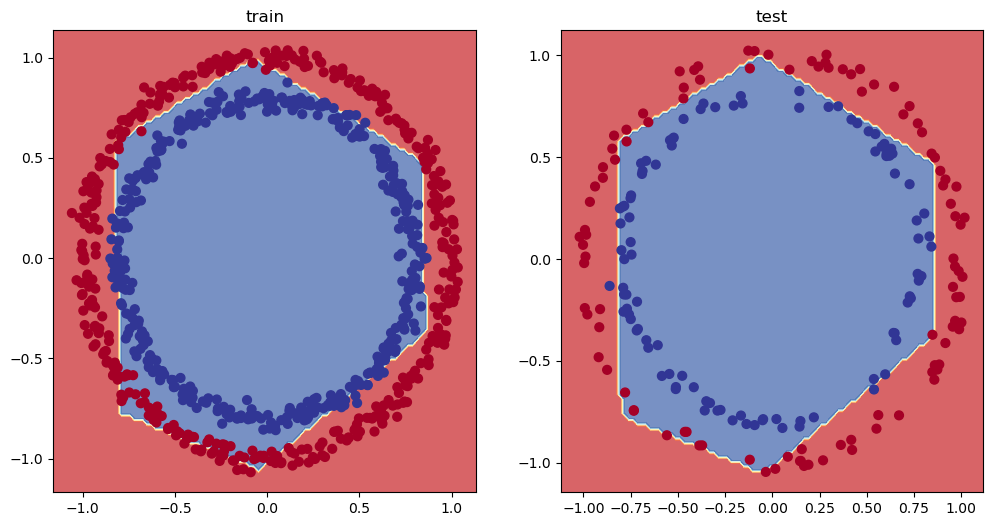

In [47]:
# Plot the decision boundaries
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("train")
plot_decision_boundary(model_11, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("test")
plot_decision_boundary(model_11, X_test, y_test)

## More classification evaluation methods

* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report(skikit learn)

In [48]:
# Check the accuracy of our model
loss, accuracy = model_11.evaluate(X_test, y_test)
print(f'model loss on the test set: {loss}')
print(f'model accuracy on the test set:{(accuracy*100):.2f}%')

7/7 [==============================] - 0s 3ms/step - loss: 0.2536 - accuracy: 0.9350
model loss on the test set: 0.25363627076148987
model accuracy on the test set:93.50%


### confusion matrix

In [50]:
from sklearn.metrics import confusion_matrix


In [58]:
y_pred = model_11.predict(X_test)

# Create prediction probabilities to binary format
tf.round(y_pred)[:10]


7/7 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [57]:
 # Create confusion matrix
confusion_matrix(y_test, tf.round(y_pred))

array([[90, 11],
       [ 2, 97]], dtype=int64)

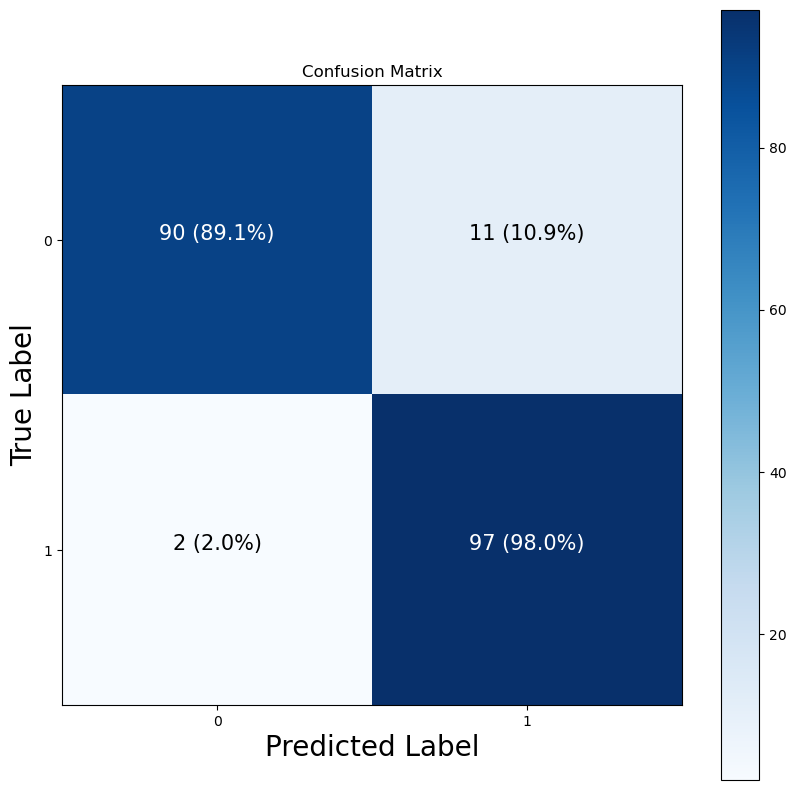

In [70]:
# remix of scikit-learn's plot_confusion_matrix

import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_pred))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
#create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
    labels = classes
    
else:
    labels = np.arange(cm.shape[0])
    
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)
# Label the axes
ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

threshold = (cm.max() + cm.min()) / 2.

#plot the text on each cell

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i,j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=15)

# Multiclass classification

In [19]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [2]:
print(f'Training sample:\n{train_data[0]}\n')
print(f'Training labels:\n{train_labels[0]}\n')


Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [3]:
#check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

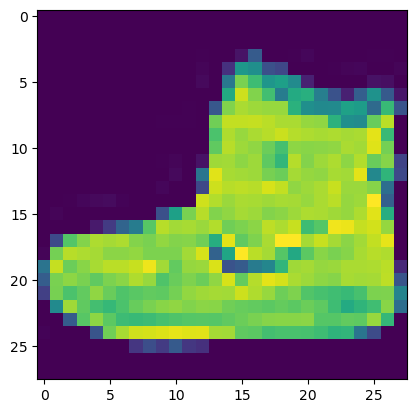

In [4]:
# Plot a sinple sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

In [5]:
# check out train labels
train_labels[0]

9

In [7]:
class_name = ["T-shirt/top", "Trouser", "Pullover", "Dress", "coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
len(class_name)

10

Text(0.5, 1.0, 'T-shirt/top')

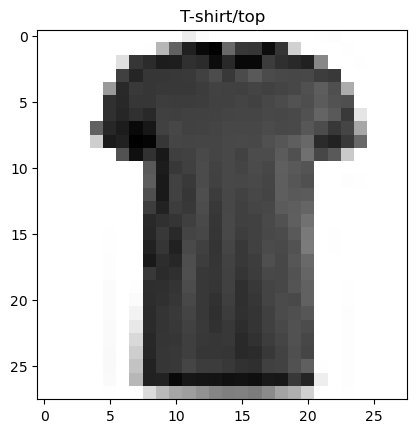

In [10]:
# Plot an example image and its label
index_of_choice = 17
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_name[train_labels[index_of_choice]])

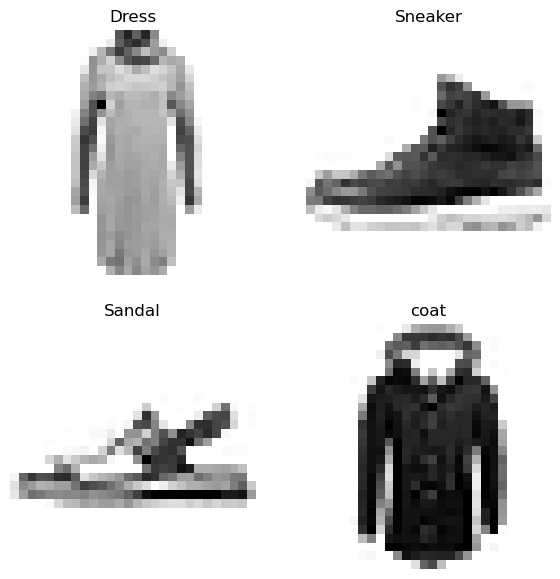

In [17]:
# plot multiple random images
import random
plt.figure(figsize=(7, 7))
for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    index = random.choice(range(len(train_data)))
    plt.imshow(train_data[index], cmap=plt.cm.binary)
    plt.title(class_name[train_labels[index]])
    plt.axis(False)

## Building a multi-class classification model

* Input shape = 28 x 28
* Output shape = 10

In [26]:
tf.random.set_seed(42)

model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_12.compile(loss="categorical_crossentropy", 
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

non_norm_history = model_12.fit(train_data, 
                                tf.one_hot(train_labels, depth=10), 
                                epochs=10, 
                                validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.3154 - accuracy: 0.1011 - val_loss: 2.3040 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3040 - accuracy: 0.0975 - val_loss: 2.3048 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3040 - accuracy: 0.0993 - val_loss: 2.3040 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3040 - accuracy: 0.0998 - val_loss: 2.3043 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3039 - accuracy: 0.0998 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3039 - accuracy: 0.1002 - val_loss: 2.3035 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3040 - accuracy: 0.0978 - val_loss: 2.3031 - val_accuracy:

In [27]:
model_12.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 4)                 3140      
                                                                 
 dense_19 (Dense)            (None, 4)                 20        
                                                                 
 dense_20 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
# min and max values
train_data.min(), train_data.max()

(0, 255)

In [31]:
# normalize our data
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

In [32]:
#min and max values
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [35]:
tf.random.set_seed(42)

model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_13.compile(loss="sparce_categorical_crossentropy",
                optimizers=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

norm_history = model_13.fit(train_data_norm,
                           train_labels, 
                           epochs=10,
                           validation_data=(test_data_norm, test_labels))

TypeError: Invalid keyword argument(s) in `compile()`: ({'optimizers'},). Valid keyword arguments include "cloning", "experimental_run_tf_function", "distribute", "target_tensors", or "sample_weight_mode".